# Heart Disease Prediction

### Import libraries

Let's import all neccesary libraries. The main library that used in that work is `pandas`. `Pandas` help to create and work with dataframes and datasets. 

For visualization I use library `matplotlib` and subpackage `pyplot`. 

For implementing Machine Learning models and processing of data, I use the `sklearn` library.

For removing warnings that produce by training model, I use the library `warnings`

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Read data

Read file 'heart.csv' to local variable 'data'

In [5]:
data = pd.read_csv("young_age.csv", sep=",")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
2,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
5,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
6,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
7,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
8,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
9,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1


### 1. Analize attributes of dataset/ Understanding the data

__--__ Firstly, We should to look on _correlation matrix_. It would help to understand dependency between the attributes. 

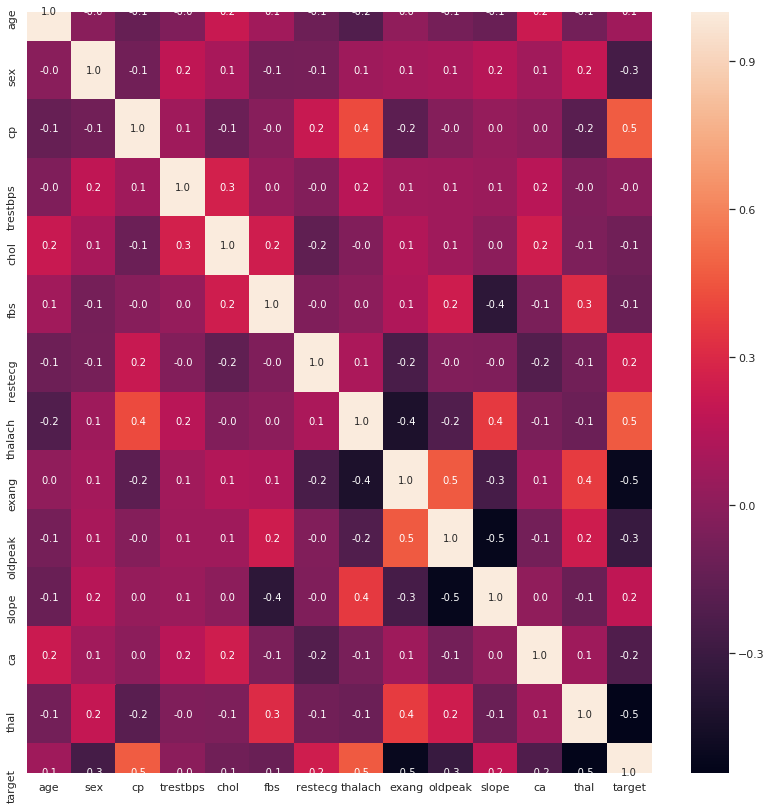

In [6]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

__--__ Secondly, let's look on target balanced plot. An extremely imbalanced dataset can render the whole model training useless and thus, will be of no use

In [7]:
data.target.value_counts()

1    46
0    13
Name: target, dtype: int64

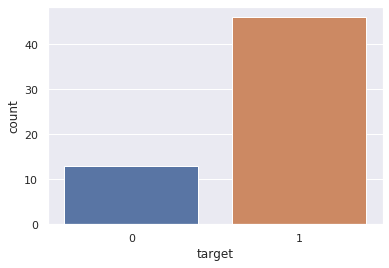

In [8]:
sns.countplot(x="target", data=data)
plt.show()

__--__ Find _missing value_

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 14 columns):
age         59 non-null int64
sex         59 non-null int64
cp          59 non-null int64
trestbps    59 non-null int64
chol        59 non-null int64
fbs         59 non-null int64
restecg     59 non-null int64
thalach     59 non-null int64
exang       59 non-null int64
oldpeak     59 non-null float64
slope       59 non-null int64
ca          59 non-null int64
thal        59 non-null int64
target      59 non-null int64
dtypes: float64(1), int64(13)
memory usage: 6.5 KB


__--__ The last point of that topic is to look close on data in our dataset. Displayed table describe values that present in data. There are import mean, min and max value of each presented attributes.

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,41.135593,0.694915,1.084746,123.661017,231.593220,0.033898,0.610169,164.881356,0.220339,0.650847,1.576271,0.169492,2.203390,0.779661
std,3.431385,0.464396,0.970036,12.518414,45.868673,0.182521,0.491898,19.778153,0.418033,0.996091,0.563346,0.530210,0.483509,0.418033
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,114.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,40.000000,0.000000,0.000000,115.000000,201.000000,0.000000,0.000000,152.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,42.000000,1.000000,1.000000,120.000000,223.000000,0.000000,1.000000,170.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000
75%,44.000000,1.000000,2.000000,130.000000,255.000000,0.000000,1.000000,179.000000,0.000000,1.200000,2.000000,0.000000,2.000000,1.000000
max,45.000000,1.000000,3.000000,152.000000,341.000000,1.000000,1.000000,202.000000,1.000000,3.800000,2.000000,3.000000,3.000000,1.000000


Also, let's point that minimum age is 29, and maximum - 77.

### 2. Statistics

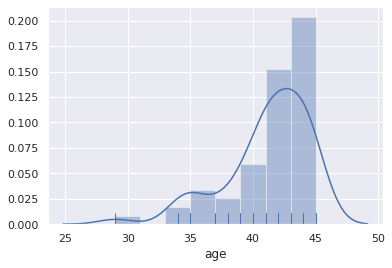

In [11]:
sns.distplot(data['age'],rug=True)
plt.show()

__Sex distribution in data__

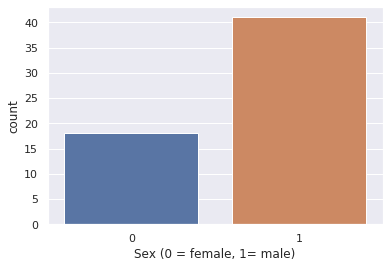

In [12]:
sns.countplot(x='sex', data=data)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

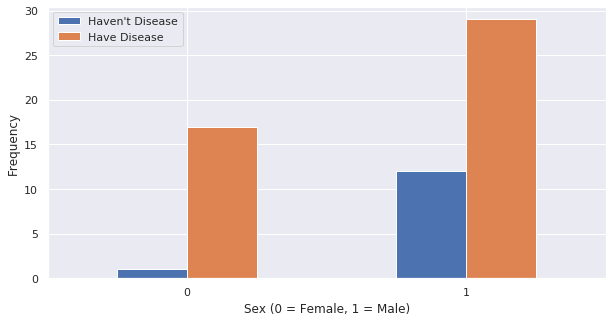

In [13]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### 4. Data Proccess

__--__ Creating Dummy Variables

In [16]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [17]:
data.shape

(59, 28)

__--__ Fit data to Standart Scaler

In [18]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [19]:
data.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,-1.215571,0.510719,0.404738,1.127937,2.884886,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,-0.039855,0.510719,-0.606734,0.363014,0.758548,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
2,0.841933,-0.294961,0.690588,0.414009,-0.659010,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0.548003,2.122080,0.338772,0.312019,0.859802,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
4,0.841933,0.510719,0.030933,0.719978,-0.253994,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
5,0.254074,1.316400,-0.122987,0.668983,-0.659010,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
6,-0.333784,1.316400,-0.716676,0.668983,0.758548,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
7,-0.039855,-1.503481,-0.738665,0.159035,-0.659010,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8,0.841933,0.510719,-0.276906,1.178932,-0.659010,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
9,1.135862,-1.584049,-0.518780,-0.860862,2.378615,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0


### 5. Train Model

#### Prepare data to train

In [20]:
x = data.drop(['target'], axis=1)
y = data['target']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logistic regression

In [22]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
print("Training accuracy: {}".format(model_lr.score(x_train, y_train)))
predicted_lr = model_lr.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_lr)))

Training accuracy: 0.9574468085106383
Testing accuracy:  0.9166666666666666


In [24]:
probabilities_lr = model_lr.predict_proba(x_test)
probabilities_lr

array([[0.10210387, 0.89789613],
       [0.10125859, 0.89874141],
       [0.01658004, 0.98341996],
       [0.10497973, 0.89502027],
       [0.01174876, 0.98825124],
       [0.84583739, 0.15416261],
       [0.74044948, 0.25955052],
       [0.33834178, 0.66165822],
       [0.83709316, 0.16290684],
       [0.0040244 , 0.9959756 ],
       [0.47652142, 0.52347858],
       [0.19172983, 0.80827017]])

#### Decision Tree Classifier

This classifier creates a decision tree based on which, it assigns the class values to each data point.


In [25]:
dt_scores = []
for i in range(1, len(x.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append([dt_classifier.score(x_test, y_test), i])

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

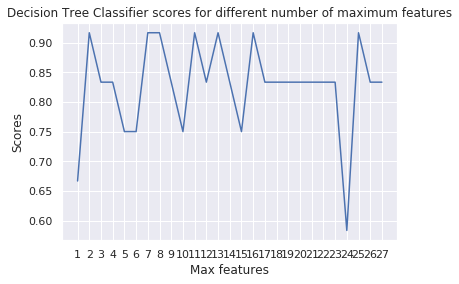

In [26]:
x_ax = [i for i in range(1, len(x.columns) + 1)]
y_ax = [i[0] for i in dt_scores]
plt.plot(x_ax, y_ax)

plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')

plt.title('Decision Tree Classifier scores for different number of maximum features')

In [27]:
dt = DecisionTreeClassifier(max_features = 17, random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=17, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [28]:
print("Training accuracy: {}".format(dt.score(x_train, y_train)))
predicted_dt = dt.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_dt)))

Training accuracy: 1.0
Testing accuracy:  0.8333333333333334


Also, I can plot a line graph and see the effect of the number of features on the model score. 

#### K Neighbors Classifier

This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point.

In [29]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append([knn_classifier.score(x_test, y_test), k])

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

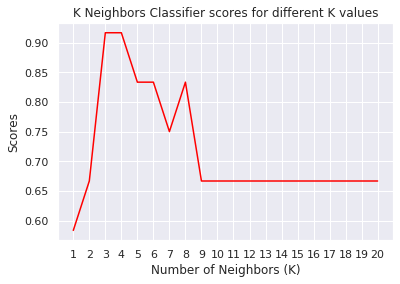

In [30]:
x_axes = [k for k in range(1, 21)]
y_axes = [i[0] for i in knn_scores]
plt.plot(x_axes,y_axes, color = 'red')
    
plt.xticks([i for i in range(1, 21)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

plt.title('K Neighbors Classifier scores for different K values')

In [31]:
print("Final score:", knn_scores[-1])

Final score: [0.6666666666666666, 20]


In [32]:
print("The best score:", max(knn_scores))

The best score: [0.9166666666666666, 4]


In [33]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [34]:
print("Training accuracy: {}".format(knn.score(x_train, y_train)))
predicted_knn = knn.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_knn)))

Training accuracy: 0.7872340425531915
Testing accuracy:  0.8333333333333334


### 6. Features importance

In [35]:
#model
model_fi = ExtraTreesClassifier()
model_fi.fit(x,y)
print(model_fi.feature_importances_)

[0.02776245 0.06240385 0.04136765 0.02901139 0.03871555 0.02600454
 0.01012462 0.13665803 0.02581246 0.05417546 0.00394793 0.0013155
 0.00863294 0.02832428 0.00401696 0.0280326  0.06178588 0.00800981
 0.01143156 0.03250097 0.06526362 0.02292436 0.         0.
 0.         0.17639452 0.09538308]


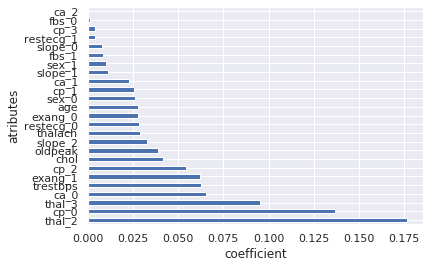

In [36]:
#plot
feat_importances = pd.Series(model_fi.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.xlabel('coefficient')
plt.ylabel('atributes')
plt.savefig('feature_importance.png')
plt.show()